In [1]:
# Data Collected from the website - https://www.worldometers.info/coronavirus/
# Data Pre - processing
# Eda - 3D - Plotly

In [2]:
# WebScrapping - beautifulsoup4
!pip install beautifulsoup4

In [277]:
from bs4 import BeautifulSoup as soup

In [278]:
from datetime import date,datetime

In [279]:
from urllib.request import Request,urlopen

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px

# Web Scrapping

In [282]:
url = 'https://www.worldometers.info/coronavirus/#countries'
req = Request(url,headers = {'User-Agent':"Mozilla/5.0"})
webpage = urlopen(req)
print(webpage)

In [283]:
today = datetime.now()
yesterday_str = "%s %d, %d" %(date.today().strftime('%b'),today.day - 1,today.year)
print(yesterday_str)
print(today)

Feb 22, 2022
2022-02-23 17:03:00.951369



<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="6
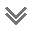

In [284]:
page_soup = soup(webpage,'html.parser')
page_soup

In [198]:
#table = page_soup.findAll('table',{'id':'main_table_countries_yesterday'})

In [ ]:
#table

In [ ]:
#containers = table[0].findAll('tr',{'style':""})
#containers

In [11]:
#containers[0]

<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>

In [164]:
#containers[1]

<tr class="total_row_world">
<td></td>
<td style="text-align:left;">World</td>
<td>426,270,377</td>
<td>+1,262,871</td>
<td>5,909,370</td>
<td>+6,373</td>
<td>353,211,100</td>
<td>+2,549,726</td>
<td>67,149,907</td>
<td>81,266</td>
<td>54,687</td>
<td>758.1</td>
<td></td>
<td></td>
<td></td>
<td data-continent="all" style="display:none">All</td>
<td>
</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>

In [165]:
#containers[2]

<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/china/">China</a></td>
<td style="font-weight: bold; text-align:right">107,851</td>
<td style="font-weight: bold; text-align:right;background-color:#FFEEAA;">+144</td>
<td style="font-weight: bold; text-align:right;">4,636 </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right">101,491</td>
<td style="font-weight: bold; text-align:right;background-color:#c8e6c9; color:#000">+42</td>
<td style="text-align:right;font-weight:bold;">1,724</td>
<td style="font-weight: bold; text-align:right">10</td>
<td style="font-weight: bold; text-align:right">75</td>
<td style="font-weight: bold; text-align:right">3</td>
<td style="font-weight: bold; text-align:right">160,000,000</td>
<td style="font-weight: bold; text-alig

In [212]:
len(country_container)

22

In [285]:
table = page_soup.findAll("table", {'id':"main_table_countries_yesterday"})
containers = table[0].findAll("tr",{"style":""})
#ttle = containers[0]

del containers[0]
all_data = []
clean = True
for country in containers:
    country_data = []
    country_container = country.findAll('td')
    #print(country_container[1].text)
    if country_container[1].text == "China":
        continue
    for i in range(1,len(country_container)):
        final_feature = country_container[i].text
        #print(final_feature)
        if clean:
            #print(country_container)
            if i != 1 and i != len(country_container) - 1: # index 1 & index last are string columns
                final_feature = final_feature.replace(",","")
                print(final_feature.find('+'))
                if(final_feature.find('+') != -1): # -1 empty/ checking data values are not empty
                    final_feature = final_feature.replace('+',"")
                    final_feature = float(final_feature)
                elif final_feature.find('-') != -1 :
                    final_feature = final_feature.replace('-','')
                    final_feature = float(final_feature)
                    
            if(final_feature == 'N/A'):
                final_feature = 0
            elif final_feature =='' or final_feature == ' ':
                final_feature = -1

                
                
            country_data.append(final_feature)
    all_data.append(country_data)   
#print(all_data)    

-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
-1
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
-1
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
-1
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
-1
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
-1
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
-1
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
-1
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
-1
-1
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-

In [264]:
df = pd.DataFrame(all_data)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,World,427968986,1632479.0,5924269,8864.0,355928455,2663773.0,66116262,80171,54904,...,-1,-1,-1,All,\n,-1,-1,-1,-1,-1
1,USA,80270563,61863.0,963371,1558.0,52199829,220355.0,27107363,10400,240195,...,942817780,2821212,334188863,North America,4,347,0,185,5,"81,114"
2,India,42867031,15102.0,512652,281.0,42189887,31377.0,164492,8944,30570,...,761230580,542855,1402272769,Asia,33,2735,2,11,0.2,117
3,Brazil,28351876,101285.0,645534,839.0,25505984,261958.0,2200358,8318,131845,...,63776166,296579,215039621,South America,8,333,3,471,4,"10,232"
4,France,22401406,97382.0,137276,285.0,19740327,319295.0,2523803,3055,341951,...,243529298,3717401,65510629,Europe,3,477,0,1487,4,"38,525"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Vatican City,29,-1.0,-1,-1.0,28,-1.0,1,-1,36070,...,-1,-1,804,Europe,28,-1,-1,-1,-1,"1,244"
217,Vanuatu,15,-1.0,1,-1.0,6,-1.0,8,-1,47,...,23000,72120,318915,Australia/Oceania,21261,318915,14,-1,-1,25
218,Western Sahara,10,-1.0,1,-1.0,8,-1.0,1,-1,16,...,-1,-1,621421,Africa,62142,621421,-1,-1,-1,2
219,Cook Islands,4,-1.0,-1,-1.0,-1,-1.0,4,-1,227,...,863,49062,17590,Australia/Oceania,4398,-1,20,-1,-1,227


In [286]:
table = page_soup.findAll("table", {'id':"main_table_countries_yesterday"})
containers = table[0].findAll("tr",{"style":""})
title = containers[0]

del containers[0]
all_data = [] # we'll create empty array to store consolidated data
clean = True

for country in containers:
    country_data = []
    country_container = country.findAll('td')
    
    if country_container[1].text == 'China':
        continue
    
    for i in range(1, len(country_container)) :
        final_feature =  country_container[i].text
        if clean :
            if i != 1 and i != len(country_container)-1 :
                final_feature  = final_feature.replace(",", "")
                
                if final_feature.find('+') !=-1:
                    final_feature = final_feature.replace('+', "")
                    final_feature = float(final_feature)
                elif final_feature.find("-") !=-1:
                    final_feature = final_feature.replace("-", "")
                    final_feature = float(final_feature)*-1
                    
            if final_feature =='N/A':
                final_feature = 0
            elif final_feature =="" or final_feature ==" ":
                final_feature = -1
                
            country_data.append(final_feature)
            
    all_data.append(country_data) 



In [58]:
all_data

[['World',
  '426270377',
  1262871.0,
  '5909370',
  6373.0,
  '353211100',
  2549726.0,
  '67149907',
  '81266',
  '54687',
  '758.1',
  -1,
  -1,
  -1,
  'All',
  '\n',
  -1,
  -1,
  -1,
  -1,
  -1],
 ['USA',
  '80145282',
  27798.0,
  '960157 ',
  294.0,
  '51929244',
  254180.0,
  '27255881',
  '11130',
  '239824',
  '2873',
  '939513088',
  '2811368',
  '334183570 ',
  'North America',
  '4',
  '348',
  '0',
  '83',
  '0.9',
  '81,560'],
 ['India',
  '42851929',
  13405.0,
  '512371 ',
  230.0,
  '42158510',
  34226.0,
  '181048',
  '8944',
  '30560',
  '365',
  '760146333',
  '542096',
  '1402235728 ',
  'Asia',
  '33',
  '2737',
  '2',
  '10',
  '0.2',
  '129'],
 ['Brazil',
  '28250591',
  42379.0,
  '644695 ',
  333.0,
  '25244026',
  195954.0,
  '2361870',
  '8318',
  '131376',
  '2998',
  '63776166',
  '296584',
  '215035499 ',
  'South America',
  '8',
  '334',
  '3',
  '197',
  '2',
  '10,984'],
 ['France',
  '22304024',
  17195.0,
  '132662 ',
  283.0,
  '19421032',
  416

In [287]:
df = pd.DataFrame(all_data)

In [288]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,World,427969715,1633208.0,5924277,8864.0,355928467,2663785.0,66116971,80171,54905,...,-1,-1,-1,All,\n,-1,-1,-1,-1,-1
1,USA,80270563,61863.0,963371,1558.0,52199829,220355.0,27107363,10400,240195,...,942817780,2821212,334188863,North America,4,347,0,185,5,"81,114"
2,India,42867031,15102.0,512652,281.0,42189887,31377.0,164492,8944,30570,...,761230580,542855,1402272769,Asia,33,2735,2,11,0.2,117
3,Brazil,28351876,101285.0,645534,839.0,25505984,261958.0,2200358,8318,131845,...,63776166,296579,215039621,South America,8,333,3,471,4,"10,232"
4,France,22401406,97382.0,137276,285.0,19740327,319295.0,2523803,3055,341951,...,243529298,3717401,65510629,Europe,3,477,0,1487,4,"38,525"


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       221 non-null    object 
 1   1       221 non-null    object 
 2   2       221 non-null    float64
 3   3       221 non-null    object 
 4   4       221 non-null    float64
 5   5       221 non-null    object 
 6   6       221 non-null    float64
 7   7       221 non-null    object 
 8   8       221 non-null    object 
 9   9       221 non-null    object 
 10  10      221 non-null    object 
 11  11      221 non-null    object 
 12  12      221 non-null    object 
 13  13      221 non-null    object 
 14  14      221 non-null    object 
 15  15      221 non-null    object 
 16  16      221 non-null    object 
 17  17      221 non-null    object 
 18  18      221 non-null    object 
 19  19      221 non-null    object 
 20  20      221 non-null    object 
dtypes: float64(3), object(18)
memory usage:

In [290]:
df.drop([15,16,17,18,19,20],inplace = True,axis =1)

In [291]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,World,427969715,1633208.0,5924277,8864.0,355928467,2663785.0,66116971,80171,54905,760.0,-1,-1,-1,All
1,USA,80270563,61863.0,963371,1558.0,52199829,220355.0,27107363,10400,240195,2883,942817780,2821212,334188863,North America
2,India,42867031,15102.0,512652,281.0,42189887,31377.0,164492,8944,30570,366,761230580,542855,1402272769,Asia
3,Brazil,28351876,101285.0,645534,839.0,25505984,261958.0,2200358,8318,131845,3002,63776166,296579,215039621,South America
4,France,22401406,97382.0,137276,285.0,19740327,319295.0,2523803,3055,341951,2095,243529298,3717401,65510629,Europe


In [292]:
column_labels = ['Country Other',
'Total Cases',
'New Cases',
'Total Deaths',
'New Deaths',
'Total Recovered',
'New Recovered',
'Active Cases',
'Serious Critical',
'Top Cases/1M pop',
'Deaths/1M pop',
'Total Tests',
'Tests/1M pop',
'Population',
'Continent'
            ]

In [293]:
df.columns = column_labels
df.head()

,Country Other,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Top Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Continent
0,World,427969715,1633208.0,5924277,8864.0,355928467,2663785.0,66116971,80171,54905,760.0,-1,-1,-1,All
1,USA,80270563,61863.0,963371,1558.0,52199829,220355.0,27107363,10400,240195,2883,942817780,2821212,334188863,North America
2,India,42867031,15102.0,512652,281.0,42189887,31377.0,164492,8944,30570,366,761230580,542855,1402272769,Asia
3,Brazil,28351876,101285.0,645534,839.0,25505984,261958.0,2200358,8318,131845,3002,63776166,296579,215039621,South America
4,France,22401406,97382.0,137276,285.0,19740327,319295.0,2523803,3055,341951,2095,243529298,3717401,65510629,Europe


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Other     221 non-null    object 
 1   Total Cases       221 non-null    object 
 2   New Cases         221 non-null    float64
 3   Total Deaths      221 non-null    object 
 4   New Deaths        221 non-null    float64
 5   Total Recovered   221 non-null    object 
 6   New Recovered     221 non-null    float64
 7   Active Cases      221 non-null    object 
 8   Serious Critical  221 non-null    object 
 9   Top Cases/1M pop  221 non-null    object 
 10  Deaths/1M pop     221 non-null    object 
 11  Total Tests       221 non-null    object 
 12  Tests/1M pop      221 non-null    object 
 13  Population        221 non-null    object 
 14  Continent         221 non-null    object 
dtypes: float64(3), object(12)
memory usage: 26.0+ KB


In [294]:
for label in df.columns:
    if label != "Country Other" and label != "Continent":
        df[label] = pd.to_numeric(df[label])
    

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Other     221 non-null    object 
 1   Total Cases       221 non-null    int64  
 2   New Cases         221 non-null    float64
 3   Total Deaths      221 non-null    int64  
 4   New Deaths        221 non-null    float64
 5   Total Recovered   221 non-null    int64  
 6   New Recovered     221 non-null    float64
 7   Active Cases      221 non-null    int64  
 8   Serious Critical  221 non-null    int64  
 9   Top Cases/1M pop  221 non-null    float64
 10  Deaths/1M pop     221 non-null    float64
 11  Total Tests       221 non-null    int64  
 12  Tests/1M pop      221 non-null    int64  
 13  Population        221 non-null    int64  
 14  Continent         221 non-null    object 
dtypes: float64(5), int64(8), object(2)
memory usage: 26.0+ KB


In [68]:
for label in df.columns:
    if label != "Country Other" and label != "Continent" :
        print(label)
        df[label] = pd.to_numeric(df[label])

Total Cases
New Cases
Total Deaths
New Deaths
Total Recovered
New Recovered
Active Cases
Serious Critical
Top Cases/1M pop
Deaths/1M pop
Total Tests
Tests/1M pop
Population


In [69]:
df.tail()

,Country Other,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Top Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Continent
215,Vatican City,29,-1.0,-1,-1.0,28,-1.0,1.0,-1,36070.0,-1.0,-1,-1,804,Europe
216,Vanuatu,15,-1.0,1,-1.0,6,-1.0,8.0,-1,47.0,3.0,23000,72124,318895,Australia/Oceania
217,Western Sahara,10,-1.0,1,-1.0,8,-1.0,1.0,-1,16.0,2.0,-1,-1,621381,Africa
218,Cook Islands,4,-1.0,-1,-1.0,-1,-1.0,4.0,-1,227.0,-1.0,863,49062,17590,Australia/Oceania
219,Total:,426270377,1262871.0,5909370,6373.0,353211100,2549726.0,67149907.0,81266,54686.5,758.1,-1,-1,-1,All


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Other     220 non-null    object 
 1   Total Cases       220 non-null    int64  
 2   New Cases         220 non-null    float64
 3   Total Deaths      220 non-null    int64  
 4   New Deaths        220 non-null    float64
 5   Total Recovered   220 non-null    int64  
 6   New Recovered     220 non-null    float64
 7   Active Cases      220 non-null    float64
 8   Serious Critical  220 non-null    int64  
 9   Top Cases/1M pop  220 non-null    float64
 10  Deaths/1M pop     220 non-null    float64
 11  Total Tests       220 non-null    int64  
 12  Tests/1M pop      220 non-null    int64  
 13  Population        220 non-null    int64  
 14  Continent         220 non-null    object 
dtypes: float64(6), int64(7), object(2)
memory usage: 25.9+ KB


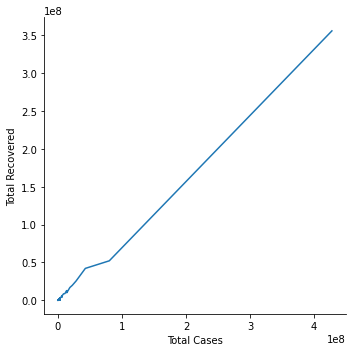

In [233]:
sns.relplot(x = "Total Cases", y ="Total Recovered", kind='line', data=df)

In [72]:
# EDA: 

In [73]:
df.columns

Index(['Country Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious Critical', 'Top Cases/1M pop', 'Deaths/1M pop', 'Total Tests',
       'Tests/1M pop', 'Population', 'Continent'],
      dtype='object')

In [296]:
df['%inc Cases'] = df['New Cases']/df['Total Cases']*100
df['%inc Deaths'] = df['New Deaths']/df['Total Deaths'] * 100
df['%inc Recovered'] = df['New Recovered']/df['Total Recovered']*100

In [297]:
df.head()

,Country Other,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Top Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Continent,%inc Cases,%inc Deaths,%inc Recovered
0,World,427969715,1633208.0,5924277,8864.0,355928467,2663785.0,66116971,80171,54905.0,760.0,-1,-1,-1,All,0.381618,0.149622,0.748405
1,USA,80270563,61863.0,963371,1558.0,52199829,220355.0,27107363,10400,240195.0,2883.0,942817780,2821212,334188863,North America,0.077068,0.161724,0.422137
2,India,42867031,15102.0,512652,281.0,42189887,31377.0,164492,8944,30570.0,366.0,761230580,542855,1402272769,Asia,0.035230,0.054813,0.074371
3,Brazil,28351876,101285.0,645534,839.0,25505984,261958.0,2200358,8318,131845.0,3002.0,63776166,296579,215039621,South America,0.357243,0.129970,1.027045
4,France,22401406,97382.0,137276,285.0,19740327,319295.0,2523803,3055,341951.0,2095.0,243529298,3717401,65510629,Europe,0.434714,0.207611,1.617476


In [247]:
cases = df[["Total Recovered",'Active Cases','Total Deaths']].loc[0]
pd.DataFrame(cases)

,Total Recovered,Active Cases,Total Deaths
0,355928455,66116262,5924269
1,52199829,27107363,963371
2,42189887,164492,512652
3,25505984,2200358,645534
4,19740327,2523803,137276
...,...,...,...
216,28,1,-1
217,6,8,1
218,8,1,1
219,-1,4,-1


In [248]:
cases = df[["Total Recovered",'Active Cases','Total Deaths']].loc[1]
pd.DataFrame(cases)

,1
Total Recovered,52199829
Active Cases,27107363
Total Deaths,963371


,Total Recovered,Active Cases,Total Deaths
0,355928455,66116262,5924269
1,52199829,27107363,963371
2,42189887,164492,512652
3,25505984,2200358,645534
4,19740327,2523803,137276
...,...,...,...
216,28,1,-1
217,6,8,1
218,8,1,1
219,-1,4,-1


In [82]:
cases_df = pd.DataFrame(cases).reset_index()
cases_df

,index,0
0,Total Recovered,353211100.0
1,Active Cases,67149907.0
2,Total Deaths,5909370.0


In [83]:
cases_df.columns = ['Type','Total']

In [84]:
cases_df

,Type,Total
0,Total Recovered,353211100.0
1,Active Cases,67149907.0
2,Total Deaths,5909370.0


In [119]:
cases_df['Virus'] = ['COVID-19' for i in range(len(cases_df))]
cases_df

,Type,Total,Virus
0,Total Recovered,353211100.0,COVID-19
1,Active Cases,67149907.0,COVID-19
2,Total Deaths,5909370.0,COVID-19


In [254]:
cases = df[["Total Recovered",'Active Cases','Total Deaths']].loc[0]
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ['Type','Total']
#df['Percentage'] = np.round(100* cases_df['Total']/np.sum(cases_df['Total']),2)
cases_df['Percentage'] = np.round(100* cases_df['Total']/np.sum(cases_df['Total']),2)
cases_df['Virus'] = ['COVID-19' for i in range(len(cases_df))]
cases_df

,Type,Total,Percentage,Virus
0,Total Recovered,355928455,83.17,COVID-19
1,Active Cases,66116262,15.45,COVID-19
2,Total Deaths,5924269,1.38,COVID-19


In [301]:
cases = df[["Total Recovered",'Active Cases','Total Deaths']].loc[0]
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ['Type','Total']
df['Percentage'] = np.round(100* cases_df['Total']/np.sum(cases_df['Total']),2)
cases_df['Percentage'] = np.round(100* cases_df['Total']/np.sum(cases_df['Total']),2)
cases_df['Virus'] = ['COVID-19' for i in range(len(cases_df))]
fig = px.bar(cases_df,x = 'Virus',y = 'Percentage',color = 'Type',hover_data = ['Total'])
fig.show()

In [256]:
cases = df[["New Cases",'New Recovered','New Deaths']].loc[0]
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns = ['Type','Total']
df['Percentage'] = np.round(100* cases_df['Total']/np.sum(cases_df['Total']),2)
cases_df['Percentage'] = np.round(100* cases_df['Total']/np.sum(cases_df['Total']),2)
cases_df['Virus'] = ['COVID-19' for i in range(len(cases_df))]
fig = px.bar(cases_df,x = 'Virus',y = 'Percentage',color = 'Type',hover_data = ['Total'])
fig.show()

In [126]:
df.columns

Index(['Country Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious Critical', 'Top Cases/1M pop', 'Deaths/1M pop', 'Total Tests',
       'Tests/1M pop', 'Population', 'Continent', '%inc Cases', '%inc Deaths',
       '%inc Recovered', 'Percentage'],
      dtype='object')

In [276]:
per = np.round(df[['%inc Cases', '%inc Deaths', '%inc Recovered']].loc[0],2)
per_df = pd.DataFrame(per)
per_df.columns = ['Percentage']

fig = go.Figure()
fig.add_trace(go.Bar(x = per_df.index,y = per_df['Percentage'],marker_color = ['Yellow','Red','Blue']))
fig.show()

In [128]:
per_df

,Percentage
%inc Cases,0.30
%inc Deaths,0.11
%inc Recovered,0.72


In [306]:
continent_df = df.groupby('Continent').sum().drop('All')

continent_df

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Top Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,%inc Cases,%inc Deaths,%inc Recovered,Percentage
Continent,,,,,,,,,,,,,,,,,
Africa,11475421,22096.0,248249,159.0,10498338,34010.0,688474,1872,1687895.0,17400.0,95347704,9581232,1393226165,-1.813427,-106.841033,2.504107,0.00
Asia,113004187,536278.0,1332251,1773.0,104919871,468689.0,6752064,31406,3915867.0,28275.0,1753049307,75238848,3225690809,43.161899,99.773279,30.711566,1.38
Australia/Oceania,3339153,31531.0,7514,30.0,3017897,26176.0,251804,243,864485.0,5597.0,70487936,8600271,43204125,-15.242540,167.608154,64.955892,0.00
Europe,152135711,809738.0,1692245,3678.0,126042562,1576801.0,24400903,16074,12396575.0,104600.0,2474593514,182043598,748371241,22.852515,104.684373,38.542800,0.00
North America,94347564,85209.0,1388328,1796.0,64445534,251618.0,28503985,16707,5749392.0,48566.0,1055145137,77326345,596681368,5.095258,-140.391022,10.695728,15.45
South America,53558796,148166.0,1251031,1338.0,44692345,306377.0,3538889,13800,1639838.0,30184.0,208271713,11905652,436593650,1.279777,101.599566,4.207441,0.00


In [305]:
continent_df = df.groupby('Continent').sum().drop('All')
continent_df = continent_df.reset_index()
continent_df

,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Top Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,%inc Cases,%inc Deaths,%inc Recovered,Percentage
0,Africa,11475421,22096.0,248249,159.0,10498338,34010.0,688474,1872,1687895.0,17400.0,95347704,9581232,1393226165,-1.813427,-106.841033,2.504107,0.00
1,Asia,113004187,536278.0,1332251,1773.0,104919871,468689.0,6752064,31406,3915867.0,28275.0,1753049307,75238848,3225690809,43.161899,99.773279,30.711566,1.38
2,Australia/Oceania,3339153,31531.0,7514,30.0,3017897,26176.0,251804,243,864485.0,5597.0,70487936,8600271,43204125,-15.242540,167.608154,64.955892,0.00
3,Europe,152135711,809738.0,1692245,3678.0,126042562,1576801.0,24400903,16074,12396575.0,104600.0,2474593514,182043598,748371241,22.852515,104.684373,38.542800,0.00
4,North America,94347564,85209.0,1388328,1796.0,64445534,251618.0,28503985,16707,5749392.0,48566.0,1055145137,77326345,596681368,5.095258,-140.391022,10.695728,15.45
5,South America,53558796,148166.0,1251031,1338.0,44692345,306377.0,3538889,13800,1639838.0,30184.0,208271713,11905652,436593650,1.279777,101.599566,4.207441,0.00


In [138]:
def continent_visualization(v_list):
    for label in v_list:
        c_df = continent_df[['Continent',label]]
        c_df['Percentage'] = np.round(100*c_df[label]/np.sum(c_df[label]),2)
        c_df['Virus'] = ['Covid_19' for i in range(len(c_df))]
        fig = px.bar(c_df,x = 'Virus',y = 'Percentage', color ='Continent',hover_data = [label])
        fig.update_layout(title={'text':f"{label}"})
        fig.show()
        #fig.collect()
                         

In [139]:
df.columns

Index(['Country Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious Critical', 'Top Cases/1M pop', 'Deaths/1M pop', 'Total Tests',
       'Tests/1M pop', 'Population', 'Continent', '%inc Cases', '%inc Deaths',
       '%inc Recovered', 'Percentage'],
      dtype='object')

In [143]:
cases_list = ['Total Cases','Active Cases','New Cases','Serious Critical','Top Cases/1M pop']
deaths_list = ['Total Deaths','New Deaths','Deaths/1M pop']
recovered_list = ['Total Recovered','New Recovered','%inc Recovered']

In [307]:
continent_visualization(cases_list)

KeyError: "['Continent'] not in index"

In [145]:
continent_visualization(deaths_list)

In [104]:
cases_df['Total']

0    353211100.0
1     67149907.0
2      5909370.0
Name: Total, dtype: float64

In [96]:
np.sum(cases_df['Total'])

426270377.0

In [ ]:
#df['Percentage'] = np.round(100* cases_df['Total']/np.sum(cases_df['Total']),2)

In [117]:
df = df.drop(['Percentage'],axis =1)

In [118]:
df

,Country Other,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Top Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Continent,%inc Cases,%inc Deaths,%inc Recovered
0,World,426270377,1262871.0,5909370,6373.0,353211100,2549726.0,67149907.0,81266,54687.0,758.1,-1,-1,-1,All,0.296261,0.107846,0.721870
1,USA,80145282,27798.0,960157,294.0,51929244,254180.0,27255881.0,11130,239824.0,2873.0,939513088,2811368,334183570,North America,0.034685,0.030620,0.489474
2,India,42851929,13405.0,512371,230.0,42158510,34226.0,181048.0,8944,30560.0,365.0,760146333,542096,1402235728,Asia,0.031282,0.044889,0.081184
3,Brazil,28250591,42379.0,644695,333.0,25244026,195954.0,2361870.0,8318,131376.0,2998.0,63776166,296584,215035499,South America,0.150011,0.051652,0.776239
4,France,22304024,17195.0,132662,283.0,19421032,416896.0,2750330.0,3055,340466.0,2025.0,243529298,3717424,65510236,Europe,0.077094,0.213324,2.146621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Vatican City,29,-1.0,-1,-1.0,28,-1.0,1.0,-1,36070.0,-1.0,-1,-1,804,Europe,-3.448276,100.000000,-3.571429
216,Vanuatu,15,-1.0,1,-1.0,6,-1.0,8.0,-1,47.0,3.0,23000,72124,318895,Australia/Oceania,-6.666667,-100.000000,-16.666667
217,Western Sahara,10,-1.0,1,-1.0,8,-1.0,1.0,-1,16.0,2.0,-1,-1,621381,Africa,-10.000000,-100.000000,-12.500000
218,Cook Islands,4,-1.0,-1,-1.0,-1,-1.0,4.0,-1,227.0,-1.0,863,49062,17590,Australia/Oceania,-25.000000,100.000000,100.000000


In [146]:
#Country Wise

In [151]:
df

,Country Other,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Top Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Continent,%inc Cases,%inc Deaths,%inc Recovered,Percentage
0,World,426270377,1262871.0,5909370,6373.0,353211100,2549726.0,67149907.0,81266,54687.0,758.1,-1,-1,-1,All,0.296261,0.107846,0.721870,33.07
1,USA,80145282,27798.0,960157,294.0,51929244,254180.0,27255881.0,11130,239824.0,2873.0,939513088,2811368,334183570,North America,0.034685,0.030620,0.489474,66.76
2,India,42851929,13405.0,512371,230.0,42158510,34226.0,181048.0,8944,30560.0,365.0,760146333,542096,1402235728,Asia,0.031282,0.044889,0.081184,0.17
3,Brazil,28250591,42379.0,644695,333.0,25244026,195954.0,2361870.0,8318,131376.0,2998.0,63776166,296584,215035499,South America,0.150011,0.051652,0.776239,NaN
4,France,22304024,17195.0,132662,283.0,19421032,416896.0,2750330.0,3055,340466.0,2025.0,243529298,3717424,65510236,Europe,0.077094,0.213324,2.146621,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Samoa,33,-1.0,-1,-1.0,3,-1.0,30.0,-1,165.0,-1.0,-1,-1,200575,Australia/Oceania,-3.030303,100.000000,-33.333333,NaN
215,Vatican City,29,-1.0,-1,-1.0,28,-1.0,1.0,-1,36070.0,-1.0,-1,-1,804,Europe,-3.448276,100.000000,-3.571429,NaN
216,Vanuatu,15,-1.0,1,-1.0,6,-1.0,8.0,-1,47.0,3.0,23000,72124,318895,Australia/Oceania,-6.666667,-100.000000,-16.666667,NaN
217,Western Sahara,10,-1.0,1,-1.0,8,-1.0,1.0,-1,16.0,2.0,-1,-1,621381,Africa,-10.000000,-100.000000,-12.500000,NaN


In [150]:
df.shape

(219, 19)

In [148]:
df = df.drop(len(df)-1)
country_df = df.drop([0])

In [149]:
country_df

,Country Other,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Top Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Continent,%inc Cases,%inc Deaths,%inc Recovered,Percentage
1,USA,80145282,27798.0,960157,294.0,51929244,254180.0,27255881.0,11130,239824.0,2873.0,939513088,2811368,334183570,North America,0.034685,0.030620,0.489474,66.76
2,India,42851929,13405.0,512371,230.0,42158510,34226.0,181048.0,8944,30560.0,365.0,760146333,542096,1402235728,Asia,0.031282,0.044889,0.081184,0.17
3,Brazil,28250591,42379.0,644695,333.0,25244026,195954.0,2361870.0,8318,131376.0,2998.0,63776166,296584,215035499,South America,0.150011,0.051652,0.776239,NaN
4,France,22304024,17195.0,132662,283.0,19421032,416896.0,2750330.0,3055,340466.0,2025.0,243529298,3717424,65510236,Europe,0.077094,0.213324,2.146621,NaN
5,UK,18654572,38409.0,160610,15.0,16817120,106796.0,1676842.0,335,272447.0,2346.0,477088898,6967809,68470433,Europe,0.205896,0.009339,0.635043,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Samoa,33,-1.0,-1,-1.0,3,-1.0,30.0,-1,165.0,-1.0,-1,-1,200575,Australia/Oceania,-3.030303,100.000000,-33.333333,NaN
215,Vatican City,29,-1.0,-1,-1.0,28,-1.0,1.0,-1,36070.0,-1.0,-1,-1,804,Europe,-3.448276,100.000000,-3.571429,NaN
216,Vanuatu,15,-1.0,1,-1.0,6,-1.0,8.0,-1,47.0,3.0,23000,72124,318895,Australia/Oceania,-6.666667,-100.000000,-16.666667,NaN
217,Western Sahara,10,-1.0,1,-1.0,8,-1.0,1.0,-1,16.0,2.0,-1,-1,621381,Africa,-10.000000,-100.000000,-12.500000,NaN


In [160]:
LOOK_AT = 10
country = country_df.columns[1:14]
fig = go.Figure()
c = 0
for i in country_df.index:
    if c < LOOK_AT :
        fig.add_trace(go.Bar(name=country_df['Country Other'][i],x = country,y=country_df.loc[i][1:14]))
    else:
        break
    c  += 1
    
fig.update_layout(title={'text':f'top{LOOK_AT}countries affected'},yaxis_type= 'log')
fig.show()   
    